<a href="https://colab.research.google.com/github/curiousbasil/GoogleStoreCaseStudyandAnalytics/blob/master/Google_Store_Case_Study_and_Analytics_CS_6341J1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Store Case Study and Analytics**

Project #1 for CS 6341J1 .
*Due on 10th of Nov 2019*

---
Case Study and Program Prepared by:

*   **Faisal Sukkar**
*   **Steven Wong**


---

##**Notebook objective:**

In this notebook, explore the provided dataset and make some inferences along the process. Finally we will build a baseline light gbm model.

##**Competition objective:**

The competition objective is to analyze the data coming from Google Merchandise Store also known as GStore. Use the customer dataset to predict log revenue per customer.






#**First Step is to Mount Google Drive**

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# To support python 2 & 3
from __future__ import division, print_function, unicode_literals
#Basic Imports
import os
import pandas as pd
import numpy as np
from google.colab import files 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import lightgbm as lgb
!pip install -q kaggle

#for stable output across runs
np.random.seed(42)

#to plot
!pip install matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



---


#**Here we Import the Data From the Kaggle Library**

In [72]:
# Install Kaggle library
!pip install kaggle

In [73]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
# Move kaggle.json to /root/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [76]:
# Download dataset
!kaggle datasets download niteshmistry/minigacustomerrevenueprediction

minigacustomerrevenueprediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
!ls -ltr

total 366780
-rw-r--r-- 1 root root  33552335 Nov  2 19:51  mini-test.csv
-rw-r--r-- 1 root root 325178219 Nov  2 19:52  mini-train.csv
drwxr-xr-x 1 root root      4096 Nov  6 16:17  sample_data
drwx------ 3 root root      4096 Nov 11 02:32  drive
-rw-r--r-- 1 root root        68 Nov 11 02:33  kaggle.json
-rw-r--r-- 1 root root  16767918 Nov 11 02:33  minigacustomerrevenueprediction.zip
-rw-r--r-- 1 root root     55554 Nov 11 02:47  baseline_lgb.csv
-rw-r--r-- 1 root root        68 Nov 11 03:44 'kaggle (1).json'


In [78]:
# Install 7zip
!apt-get install p7zip-full

# Unzip
!7za e minigacustomerrevenueprediction.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 16767918 bytes (16 MiB)

Extracting archive: minigacustomerrevenueprediction.zip
--
Path = minigacustomerrevenueprediction.zip
Type = zip
Physical Size = 16767918

  0%    
Would you like to replace the existing file:
  Path:     ./mini-test.csv
  Size:     33552335 bytes (32 MiB)
  Modified: 2019-11-02 19:51:56
with the file from archive:
  Path:     mini-test.csv
  Size:     33552335 bytes (32 MiB)
  Modified: 2019-11-02 19:51:56
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all /

In [79]:
# List files
!ls -ltr

total 366780
-rw-r--r-- 1 root root  33552335 Nov  2 19:51  mini-test.csv
-rw-r--r-- 1 root root 325178219 Nov  2 19:52  mini-train.csv
drwxr-xr-x 1 root root      4096 Nov  6 16:17  sample_data
drwx------ 3 root root      4096 Nov 11 02:32  drive
-rw-r--r-- 1 root root        68 Nov 11 02:33  kaggle.json
-rw-r--r-- 1 root root  16767918 Nov 11 02:33  minigacustomerrevenueprediction.zip
-rw-r--r-- 1 root root     55554 Nov 11 02:47  baseline_lgb.csv
-rw-r--r-- 1 root root        68 Nov 11 03:44 'kaggle (1).json'




---


#**Let's Set the Data We Just Imported**

In [0]:
import pandas as pd
# Load train data
train = pd.read_csv('./mini-train.csv')

In [0]:
import pandas as pd
# Load train data
test = pd.read_csv('./mini-test.csv')



---


#**Let's Take a Quick look at the features of this data set and some general information of the Data it holds**

In [82]:
train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercab

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 59 columns):
channelGrouping                                      20000 non-null object
customDimensions                                     20000 non-null object
date                                                 20000 non-null int64
fullVisitorId                                        20000 non-null uint64
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
device.browser                                       20000 non-null object
device.browserSize                                   20000 non-null object
device.browserVersion                                20000 non-null ob

####From this we can see above that there are 20,000 rows of data in total. From the entries there are 20k fullVisitoID, Of those only 193  rows of "totals.transactionRevenue" have values. Which means there are only 193 visits that resulted in purchases. Let's see this ratio below.


In [0]:
#Below we will say NZV is Non-Zero Values and NZU is Non-Zero Unique (visitors).
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
train_nzv = pd.notnull(train["totals.transactionRevenue"]).sum()
train_nzu = (gdf["totals.transactionRevenue"]>0).sum()

In [85]:
print("Number of instances in training set with non-zero revenue : ", train_nzv, " and ratio is : ", train_nzv / train.shape[0])
print("Number of unique customers with non-zero revenue : ", train_nzu, "and the ratio is : ", train_nzu / gdf.shape[0])
print("Number of unique visitors in training set : ",train.fullVisitorId.nunique(), " out of rows : ",train.shape[0])
print("Number of unique visitors in testing set : ",test.fullVisitorId.nunique(), " out of rows : ",test.shape[0])
print("Number of common visitors in train and test set : ",len(set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique())) ))

Number of instances in training set with non-zero revenue :  193  and ratio is :  0.00965
Number of unique customers with non-zero revenue :  189 and the ratio is :  0.010280678851174934
Number of unique visitors in training set :  18384  out of rows :  20000
Number of unique visitors in testing set :  1855  out of rows :  2000
Number of common visitors in train and test set :  7


#**Data Overview in Terms of Visits, Unique Visitors and Total Transaction Revenue**
###The calculation above shows the ratio of the visits that resulted in purchases. 193 / 20k = 0.00965. Which means that only 0.9% of visits ended with a purchase. 
###We see that out of the 20,000 visits in the training dataset 18,384 of them are unique visitors. We can see that 189/18384 ≈ 0.01028 which means 1% of the unique visitors ended up in a purchase.
###Another thing we can notice is that the ratio of the unique visitors in the training dataset (18384/20000=0.9192) and the ratio of the unique visitors on the test data set (1855/2000=0.9275) to the overall dataset are consistent at about 92%.


---



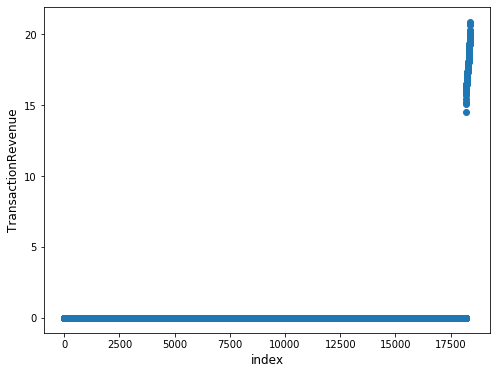

In [86]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

#**Visualizing the data above:**
###Looking at the Data and Ratios found above, we can see that the plot shown  proves that most visits did not result in a purchase and that only a small percentage of the visits ended up so. This refers back to the original statement in the Kaggle competition that out of many visitors only a few will generate revenue. Their general prediction was 20% of visits will end up in a purchase, but based on the ratios shown above, it shows that it is currently even less than that. Let us visualize more of the data and find correlations which will in turn help us find the best model to train and predict which visitors will end up purchasing and how much. This can later help with decision making to increase the ratio and increase revenue.

---

In [88]:
train.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adwordsClickInfo.page
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0,630.000000
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0,1.023810
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0,0.172159
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0,1.000000
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0,1.000000
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0,1.000000
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0,1.000000
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0,3.000000




---


#**Data Cleansing**





#**Columns with Consistent or Null Values**


---



In [89]:
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

## As we see above, that 19 columns have either Null Values or Constant Values. This does not provide much or any information regarding the data set and will not affect the prediction model. We can therefore drop these from our data set then continue with our process.



---




In [90]:
train.shape

(20000, 59)

###train.shape shows that there are 20,000 rows and 59 columns. Let us drop the columns shown above.

In [91]:
import pandas as pd
train.drop(['socialEngagementType', 'device.browserSize', 'device.browserVersion',
 'device.flashVersion', 'device.language',
 'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
 'device.mobileInputSelector', 'device.operatingSystemVersion',
 'device.screenColors', 'device.screenResolution',
 'geoNetwork.cityId', 'geoNetwork.latitude',
 'geoNetwork.longitude', 'geoNetwork.networkLocation',
 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters'], axis=1)

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171110,3807686301035257712,"[{'hitNumber': '1', 'time': '0', 'hour': '4', ...",1510317736,1,1510317736,Chrome,desktop,False,Windows,Warsaw,Europe,Poland,(not set),netia.com.pl,Masovian Voivodeship,Eastern Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
19996,Organic Search,[],20171110,4492072782143336080,"[{'hitNumber': '1', 'time': '0', 'hour': '19',...",1510370284,1,1510370284,Chrome,desktop,False,Windows,Hanoi,Asia,Vietnam,(not set),(not set),Hanoi,Southeast Asia,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
19997,Organic Search,"[{'index': '4', 'value': 'South America'}]",20171110,3048540404757501270,"[{'hitNumb

In [0]:
#train_dc is the training data post Column Cleanse
train_dc = pd.DataFrame(train, columns= ['channelGrouping',
'customDimensions',
'date',
'fullVisitorId',
'hits',
'visitId',
'visitNumber',
'visitStartTime',
'device.browser',
'device.deviceCategory',
'device.isMobile',
'device.operatingSystem',
'geoNetwork.city',
'geoNetwork.continent',
'geoNetwork.country',
'geoNetwork.metro',
'geoNetwork.networkDomain',
'geoNetwork.region',
'geoNetwork.subContinent',
'totals.bounces',
'totals.hits',
'totals.newVisits',
'totals.pageviews',
'totals.sessionQualityDim',
'totals.timeOnSite',
'totals.totalTransactionRevenue',
'totals.transactionRevenue',
'totals.transactions',
'trafficSource.adContent',
'trafficSource.adwordsClickInfo.adNetworkType',
'trafficSource.adwordsClickInfo.gclId',
'trafficSource.adwordsClickInfo.isVideoAd',
'trafficSource.adwordsClickInfo.page',
'trafficSource.adwordsClickInfo.slot',
'trafficSource.campaign',
'trafficSource.isTrueDirect',
'trafficSource.keyword',
'trafficSource.medium',
'trafficSource.referralPath',
'trafficSource.source',
])

In [93]:
train_dc.shape

(20000, 40)

###After dropping the unnecessary columns we now have 20000 rows and only 40 columns.

In [94]:
train_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
channelGrouping                                 20000 non-null object
customDimensions                                20000 non-null object
date                                            20000 non-null int64
fullVisitorId                                   20000 non-null uint64
hits                                            20000 non-null object
visitId                                         20000 non-null int64
visitNumber                                     20000 non-null int64
visitStartTime                                  20000 non-null int64
device.browser                                  20000 non-null object
device.deviceCategory                           20000 non-null object
device.isMobile                                 20000 non-null bool
device.operatingSystem                          20000 non-null object
geoNetwork.city                                 20000 non

In [95]:
train_dc.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


#**Further Data Cleaning**
###Let us clean the data even further. We will do this by removing all rows where visits did not result in a purchase. From the data and ratios above we should expect to see a dataset that only has 193 rows and 40 columns. Lets try it out.

In [0]:
import numpy as np
train_trx = train_dc[np.isfinite(train_dc['totals.totalTransactionRevenue'])]

In [97]:
train_trx.shape

(193, 40)

###This is exactly what we expected. When we ran (train_trx.shape) we got a result of 193 rows and 40 columns. Now let us take a look at some rows to confirm that all of 'totals.totalTransactionRevenue' have values.

In [98]:
train_trx

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
433,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,9549826748224805897,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508200705,4,1508200705,Chrome,desktop,False,Macintosh,New York,Americas,United States,New York NY,(not set),New York,Northern America,NaN,9,NaN,9.0,13.0,261.0,17190000.0,15190000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
550,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,3700714855829972615,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",1508192636,11,1508192636,Chrome,desktop,False,Windows,Irvine,Americas,United States,Los Angeles CA,(not set),California,Northern America,NaN,15,NaN,12.0,38.0,285.0,13000000.0,8000000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),/,(direct)
555,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,1572225825161580042,"[{'hitNumber': '1', 'time': '0', 'hour': '6', ...",1508162218,6,1508162218,Safari,mobile,True,iOS,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,purechat.com,California,Northern America,NaN,15,NaN,15.0,42.0,1044.0,65300000.0,57300000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
597,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,7187192533100162289,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1508189401,17,1508189401,Chrome,desktop,False,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,18,NaN,16.0,77.0,514.0,25230000.0,18230000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),/,(direct)
619,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,7889233516776348524,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1508190484,1,1508190484,Chrome,desktop,False,Macintosh,New York,Americas,United States,New York NY,(not set),New York,Northern America,NaN,21,1.0,20.0,62.0,487.0,16310000.0,12310000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),/,(direct)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19769,Organic Search,[],20171110,2806198238051869421,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1510343526,5,1510343526,Chrome,mobile,True,Android,not available in demo dataset,Americas,Colombia,not available in demo dataset,metrotel.net.co,not available in demo dataset,South America,NaN,52,NaN,27.0,27.0,669.0,231000000.0,227000000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
19776,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171110,4921798700570421930,"[{'hitNumber': '1', 'time': '0', 'hour': '8', ...",1510330010,7,1510330010,Chrome,desktop,False,Windows,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,63,NaN,38.0,70.0,742.0,24200000.0,23200000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
19782,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171110,5488454547880118132,"[{'hi

#Data To be used:
###Although the data in train_trx shows only visits which resulted in purchases, we will use the dataset in train_dc (after column cleanse) because any analysis conducted on it will reflect the true ratio of purchases (revenue) to visits. We will also compare the train_dc and train_trx to see if anything stands out or changes between the two data sets an focus on the features that could determine a sell.


---



#Scatterplot of total visits to the store against Total Trnsaction revenue

Text(0, 0.5, 'Total Trx Revenue')

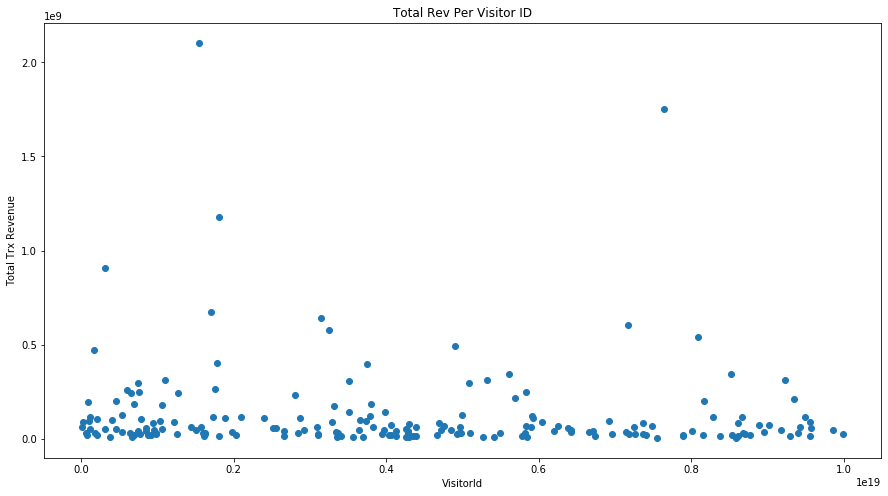

In [99]:
import pandas as pd
fig, ax = plt.subplots(figsize=(15,8))
# scatter the fullVisitorId against the totals.totalTransactionRevenue
ax.scatter(train_dc['fullVisitorId'], train_dc['totals.totalTransactionRevenue'])
# set a titles of the axes and labels
ax.set_title('Total Rev Per Visitor ID')
ax.set_xlabel('VisitorId')
ax.set_ylabel('Total Trx Revenue')

###Scatterplot of visits that ended up in purchases from the store

---



Text(0, 0.5, 'Total Trx Revenue')

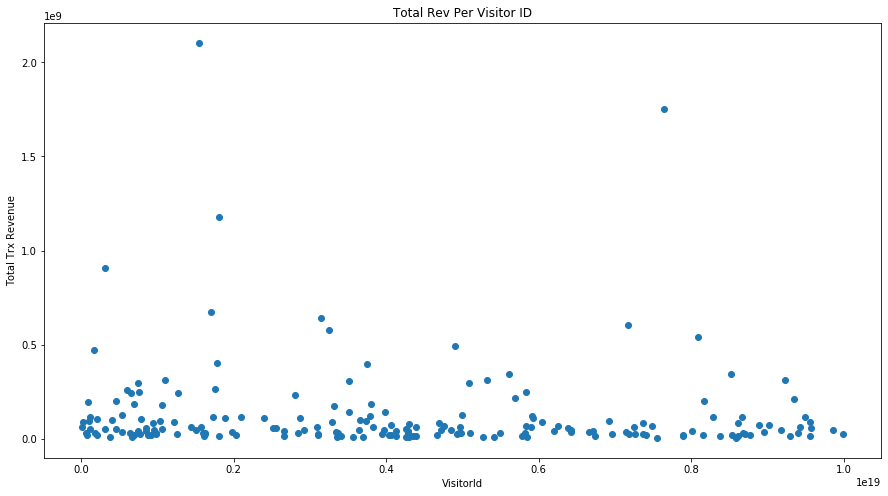

In [100]:
import pandas as pd
fig, ax = plt.subplots(figsize=(15,8))
# scatter the fullVisitorId against the totals.totalTransactionRevenue
ax.scatter(train_trx['fullVisitorId'], train_trx['totals.totalTransactionRevenue'])
# set a titles of the axes and labels
ax.set_title('Total Rev Per Visitor ID')
ax.set_xlabel('VisitorId')
ax.set_ylabel('Total Trx Revenue')

###Both scatter plots above are quite identical which proves yet again that most visits did not result in a purchase from the store.



---
#**Bar Chart of Date (Month) of Transactions**

###Something we can notice in the chart below is that at around the New Years time (end and beginning weeks of a year) visits to the store do increase.



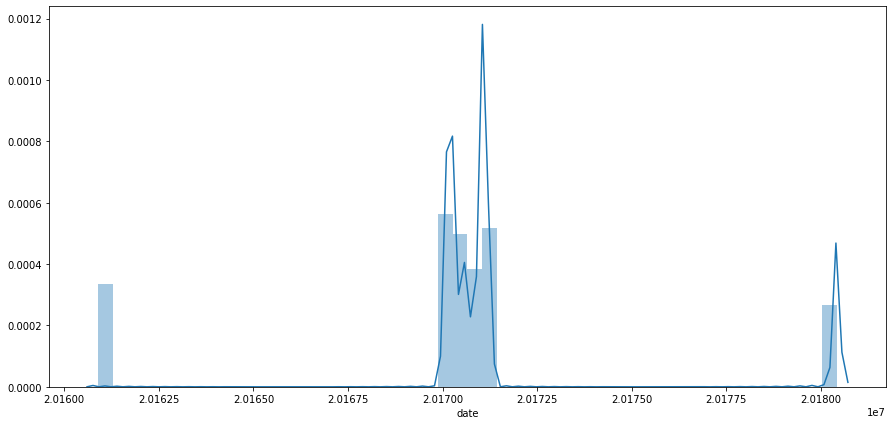

In [101]:
plt.figure(figsize=(15,7))
plt.tight_layout()
seabornInstance.distplot(train_dc['date'])

### Let us check if purchases increase too.

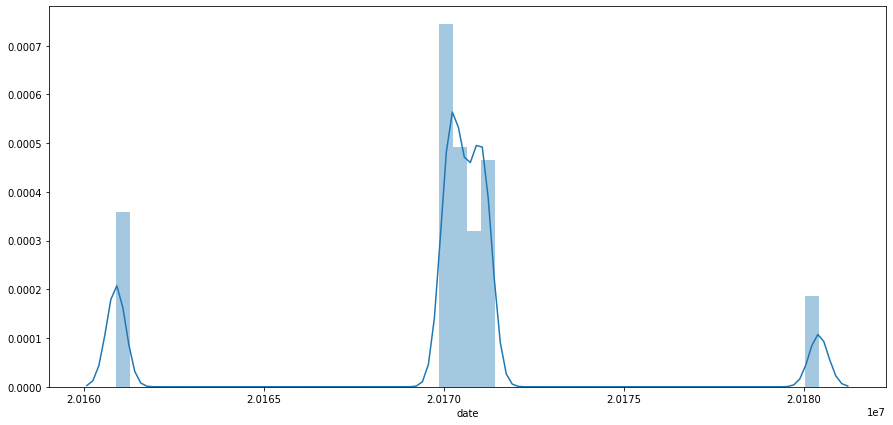

In [102]:
plt.figure(figsize=(15,7))
plt.tight_layout()
seabornInstance.distplot(train_trx['date'])

####The Charts are almost identical. There is an obvious increase in purchased around December to January of 2017. The holiday season might have a positive correlation to the increase in purchases.






---

#**Start of session Time of the day and Day of the week Histograms**
###We noticed that the visitStartTime is denoted as POSIX time . Therefore we will change it to readable time.




In [0]:
#For this we will first create a copy of the data sets in order to have a barchart which reflects the data more correctly
train_trxdt = train_trx.copy()
train_dcdt = train_dc.copy()

In [0]:
train_trxdt["visitStartTime"]=train_trxdt["visitStartTime"].astype("datetime64[s]")
train_dcdt["visitStartTime"]=train_dcdt["visitStartTime"].astype("datetime64[s]")

In [105]:
#Let us take a look at the visitStarttime column now
train_dcdt.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,2017-10-17 00:00:50,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,2017-10-16 17:51:47,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508201613,1,2017-10-17 00:53:33,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",1508169851,1,2017-10-16 16:04:11,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1508190552,1,2017-10-16 21:49:12,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


## Now that the Start time is denoted correctly lets run it in a chart to see the frequency of visits by day and time 

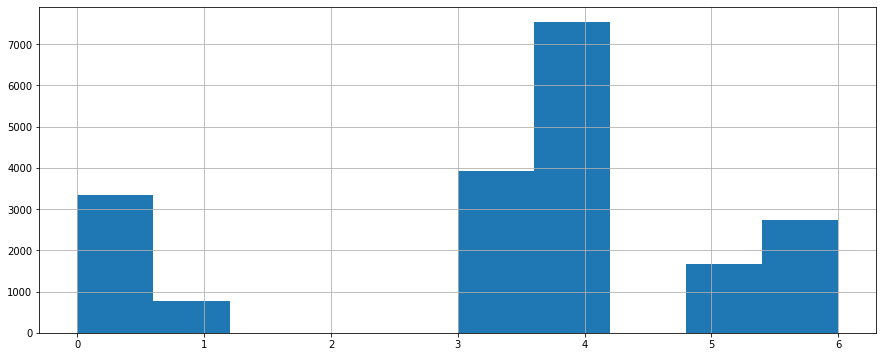

In [109]:
#Visit frequency by day of the week
train_dcdt.visitStartTime.dt.dayofweek.hist(figsize=(15,6))

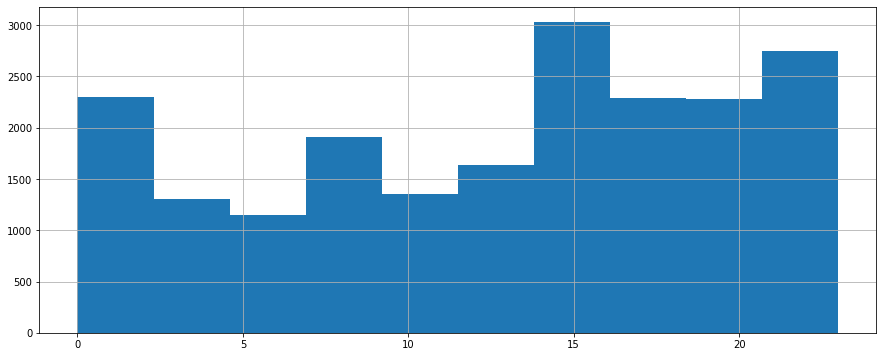

In [108]:
#Visit frequency by time of the day (GMT)
train_dcdt.visitStartTime.dt.hour.hist(figsize=(15,6))

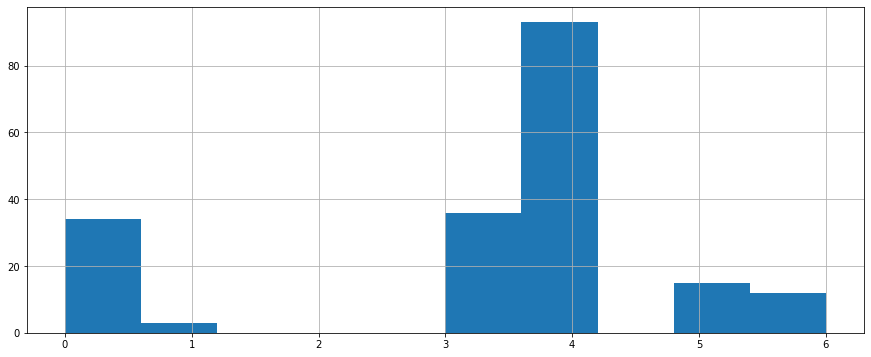

In [110]:
#Visit frequency which ended in a purchase by day of the week
train_trxdt.visitStartTime.dt.dayofweek.hist(figsize=(15,6))

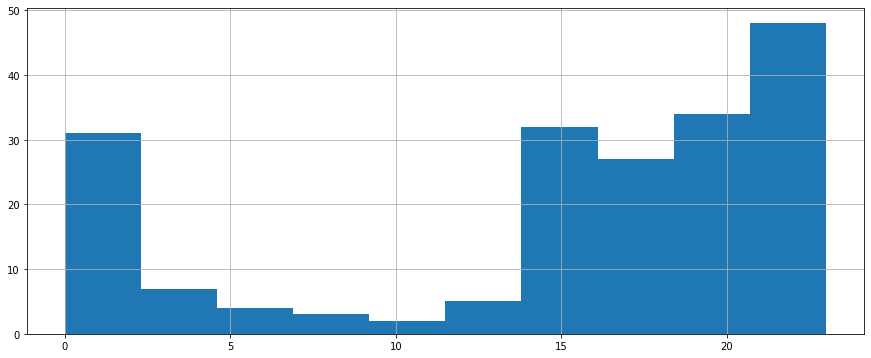

In [111]:
#Visit frequency which ended in a purchase by hour of the day (GMT)
train_trxdt.visitStartTime.dt.hour.hist(figsize=(15,6))

###As shown above, the histogram shows the frequency of visits during any given hour of the day . It is from 0 to 23. Note that the time is GMT time. Therefore since most of the visitors and purchases are from the USA, we will need to convert the time into EST or PST to better predict a trend. Below we will cover this when we see the breakdown based on city.

### Above is a histogram which shows the number of visits in any given day during the week. Since this is generated by a panda data frame, the days of the week are denoted by numbers. Zero being Monday and Sunday being 6.
###We see that most visits occur around Thursday, around 3pm GMT. Let us see if the visits stay consistent with purchases.

###Based on the last two histograms, we see that Thursday is both the most popular day of the week with the highest visits and the most sales. In terms of time we see that the most popular start time for a visit is around 3pm GMT but the most popular time to purchase is 9pm GMT. When converted to EST these are 10am start time and a 4pm Purchase time. 



---
#**Breakdown and Bar Chart of Operating System Type**


---



Breakdown by OS Type : 
Windows          7651
Macintosh        4928
Android          3205
iOS              2583
Linux             812
Chrome OS         620
(not set)         131
Windows Phone      31
Tizen              12
Samsung             9
Name: device.operatingSystem, dtype: int64


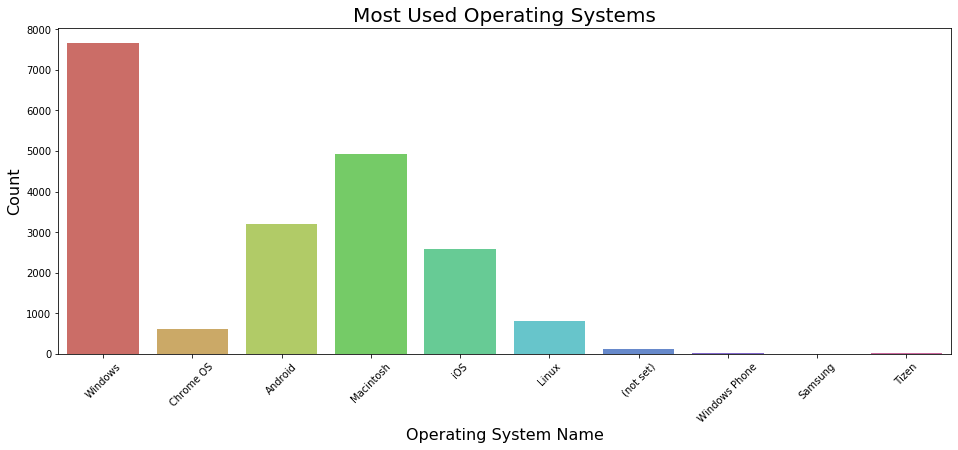

In [112]:
# the top 10 of browsers represent % of total
print("Breakdown by OS Type : ")
print(train_dc['device.operatingSystem'].value_counts()[:10] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_dc[train_dc['device.operatingSystem']\
                       .isin(train_dc['device.operatingSystem']\
                             .value_counts()[:10].index.values)]['device.operatingSystem'], palette="hls")
plt.title("Most Used Operating Systems", fontsize=20) 
plt.xlabel("Operating System Name", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45)
plt.show()

###From the Barchart and breakdown above we see the following figures:
###*Top Used Operating Systems in the data set:*
*   Windows          7651
*   Macintosh        4928
*   Android          3205
*   iOS              2583
*   Linux             812
*   Chrome OS         620

### It is obvious that from the entire data sets that most of the visitors have Windows OS running. 

##Now lets check the OS of the visitors that have puchased from the store 



Breakdown by OS Type : 
Macintosh    111
Windows       34
Chrome OS     18
iOS           12
Linux         12
Android        6
Name: device.operatingSystem, dtype: int64


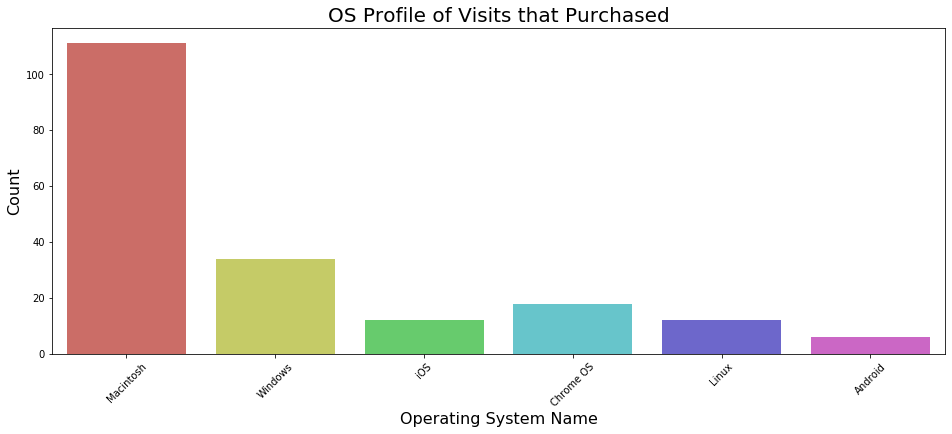

In [113]:
# the top 10 of browsers represent % of total
print("Breakdown by OS Type : ")
print(train_trx['device.operatingSystem'].value_counts()[:10] )
# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_trx[train_trx['device.operatingSystem']\
                       .isin(train_trx['device.operatingSystem']\
                             .value_counts()[:10].index.values)]['device.operatingSystem'], palette="hls")
plt.title("OS Profile of Visits that Purchased", fontsize=20) 
plt.xlabel("Operating System Name", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45)
plt.show()

###Based on the findings above we notice that although most visits to the store are Windows Users, most of the visits that ended up in purchases came from users with Mac OS. 

***OS Profile of vistis which ended up as purchases:***
* Macintosh    111
* Windows       34
* Chrome OS     18
* Linux         12
* iOS           12
* Android        6

###This may be something to keep in mind later when making decisions.


---





---


#**Breakdown By Continent & Associated Bar chart**


---


From the chart below we can see that most of the visitors come from the Americas; followed by Europe and Asia.

Breakdown by Continent : 
Americas     10521
Europe        4511
Asia          4253
Africa         357
Oceania        337
(not set)       21
Name: geoNetwork.continent, dtype: int64


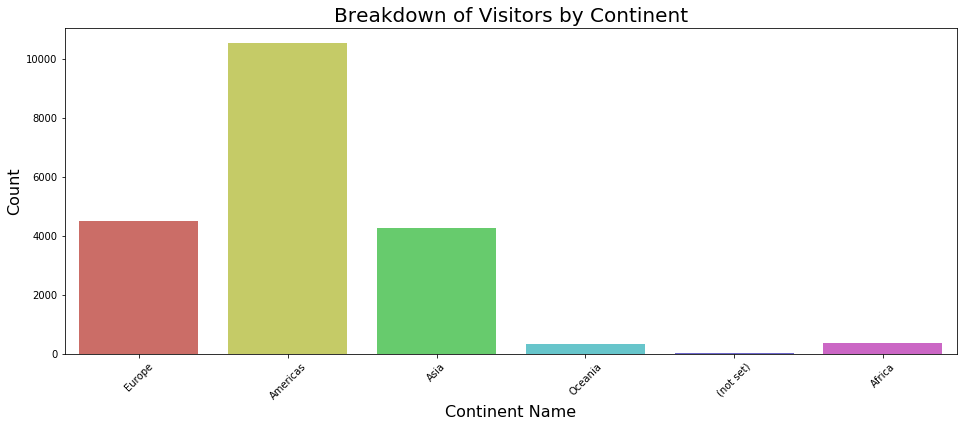

In [114]:
# Percentage of users by Continent
print("Breakdown by Continent : ")
print(train_dc['geoNetwork.continent'].value_counts()[:7] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_dc[train_dc['geoNetwork.continent']\
                       .isin(train_dc['geoNetwork.continent']\
                             .value_counts()[:10].index.values)]['geoNetwork.continent'], palette="hls") 
plt.title("Breakdown of Visitors by Continent", fontsize=20) 
plt.xlabel("Continent Name", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

###Now let's check from where were the visitors who purchased the most.

Breakdown by Continent : 
Americas    191
Asia          2
Name: geoNetwork.continent, dtype: int64


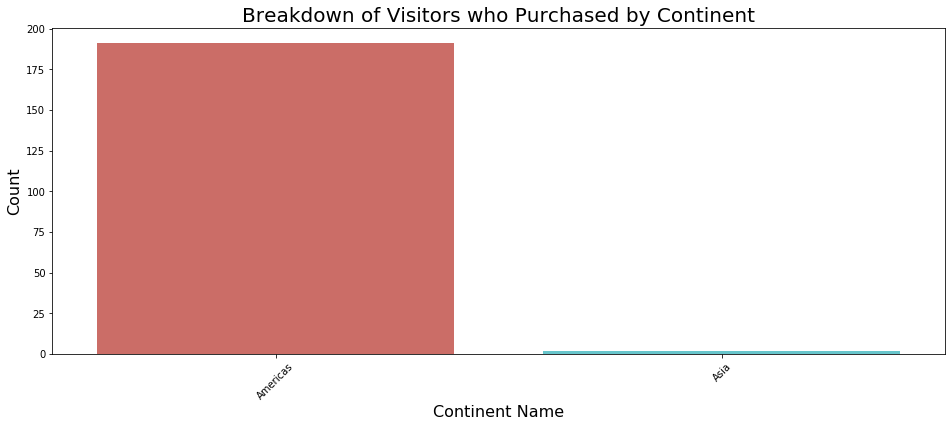

In [116]:
# Percentage of users by Continent
print("Breakdown by Continent : ")
print(train_trx['geoNetwork.continent'].value_counts()[:7] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_trx[train_trx['geoNetwork.continent']\
                       .isin(train_trx['geoNetwork.continent']\
                             .value_counts()[:10].index.values)]['geoNetwork.continent'], palette="hls") 
plt.title("Breakdown of Visitors who Purchased by Continent", fontsize=20) 
plt.xlabel("Continent Name", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

###There is a positive correlation between the number of visit to the website and completed transaction from Americas. However, it does not apply for Europe which although ranked higher than Asia in terms of visits, this did not convert to purchases. A further study can be done to better convert these visits to purchases. 


###G- Store is still a relatively small player in Asia, compared to JD.com and Alibaba who are investing heavily to attract mobile shoppers throughout the influential Southeast Asia market. References: https://go.forrester.com/blogs/online-retail-in-southeast-asia-is-expected-to-reach-53-billion-by-2023). Also, Chinese government placed a censorship on Google and limiting its presence to the huge potential mobile e-commerce sales. References: https://www.scmp.com/tech/china-tech/article/2101582/mobile-e-commerce-sales-china-poised-top-us1-trillion). A trend is a majority of China sales going through the mobile platform compared to US sales with a focus on the Windows platform (desktop). In addition, a study can be conducted to verify the prediction. With the trade war still in place, Google must comply with US sanctions to not license the Google app with Huawei phones that are sold in the United States, further hurting additional possible revenue streams. References: https://www.quora.com/Why-did-Google-remove-Huawei-phones-from-accessing-Android-and-the-Google-Play-platform)


---



#**Breakdown by City**

Breakdown by City : 
not available in demo dataset    70
Mountain View                    29
New York                         26
Chicago                          15
San Francisco                    15
Sunnyvale                         5
Seattle                           4
San Jose                          4
Ann Arbor                         3
Santa Clara                       3
Los Angeles                       3
Irvine                            3
Kirkland                          2
San Diego                         2
Boston                            2
Washington                        2
Cambridge                         1
Tigard                            1
Toronto                           1
Dallas                            1
Name: geoNetwork.city, dtype: int64


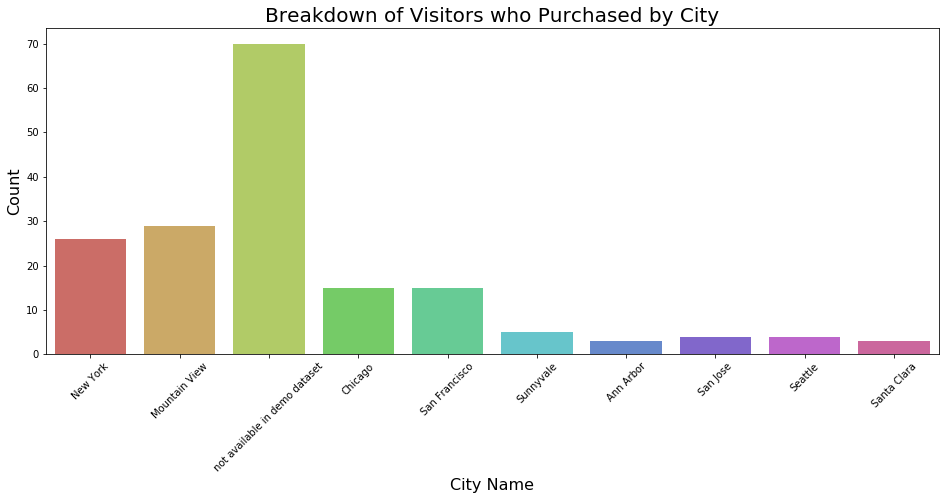

In [117]:
# Percentage of users by city
print("Breakdown by City : ")
print(train_trx['geoNetwork.city'].value_counts()[:20] )
# seting the graph size
plt.figure(figsize=(16,6))
# Let explore the browser used by users
seabornInstance.countplot(train_trx[train_trx['geoNetwork.city']\
                      .isin(train_trx['geoNetwork.city']\
                            .value_counts()[:10].index.values)]['geoNetwork.city'], palette="hls")
plt.title("Breakdown of Visitors who Purchased by City", fontsize=20)
plt.xlabel("City Name", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45)
plt.show()



---


#**Device Category and Associated Bar Chart**

Breakdown by Device Category : 
desktop    13988
mobile      5284
tablet       728
Name: device.deviceCategory, dtype: int64


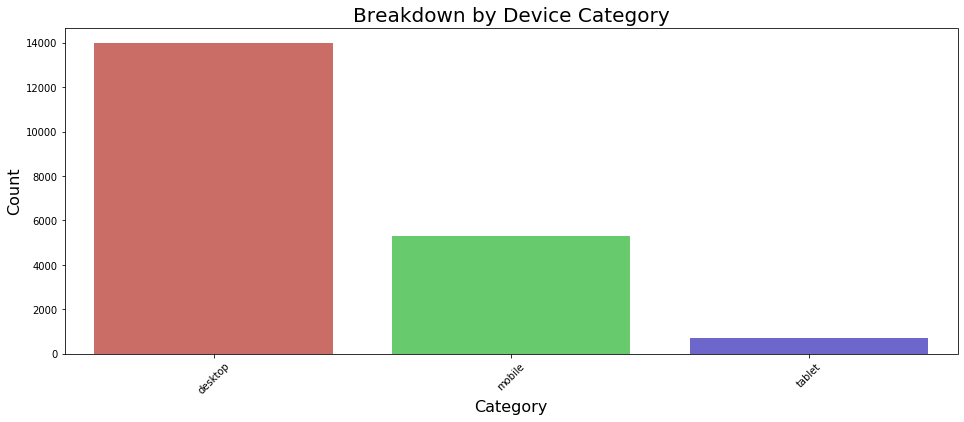

In [118]:
# Device Category Per User
print("Breakdown by Device Category : ")
print(train_dc['device.deviceCategory'].value_counts()[:10] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_dc[train_dc['device.deviceCategory']\
                       .isin(train_dc['device.deviceCategory']\
                             .value_counts()[:10].index.values)]['device.deviceCategory'], palette="hls") 
plt.title("Breakdown by Device Category", fontsize=20) 
plt.xlabel("Category", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

###As the bar chart above shows, Approximately 70% (13988) Visits are from desktop devices. Let's see if this is consistent with visits that translate to purchases.


Count of Category Per Purchase : 
desktop    174
mobile      17
tablet       2
Name: device.deviceCategory, dtype: int64


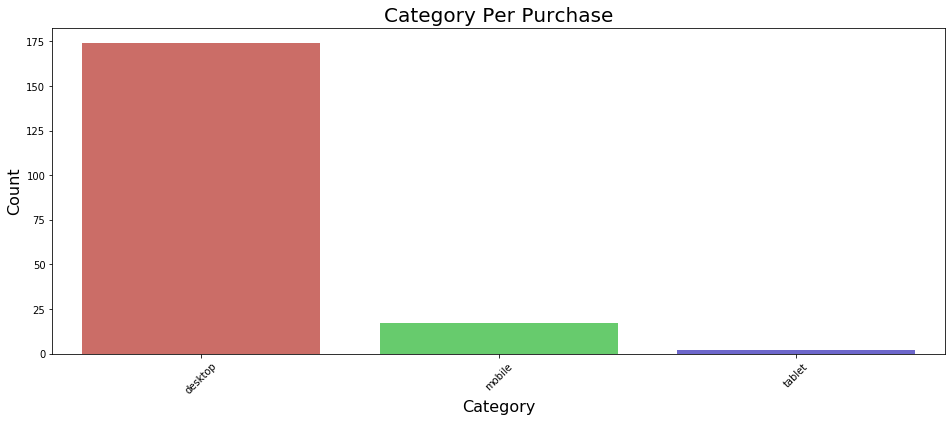

In [119]:
# Category Per Purchase
print("Count of Category Per Purchase : ")
print(train_trx['device.deviceCategory'].value_counts()[:10] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_trx[train_trx['device.deviceCategory']\
                       .isin(train_trx['device.deviceCategory']\
                             .value_counts()[:10].index.values)]['device.deviceCategory'], palette="hls") 
plt.title("Category Per Purchase", fontsize=20) 
plt.xlabel("Category", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

###This holds consistent as over 90% of visitors were on their laptop.


---



#**Traffic Source: Direct Marketing or Organic Search**

Count of visits per traffic source : 
(direct)                8198
google                  6767
youtube.com             3247
analytics.google.com     449
Partners                 425
google.com               125
sites.google.com         115
Name: trafficSource.source, dtype: int64


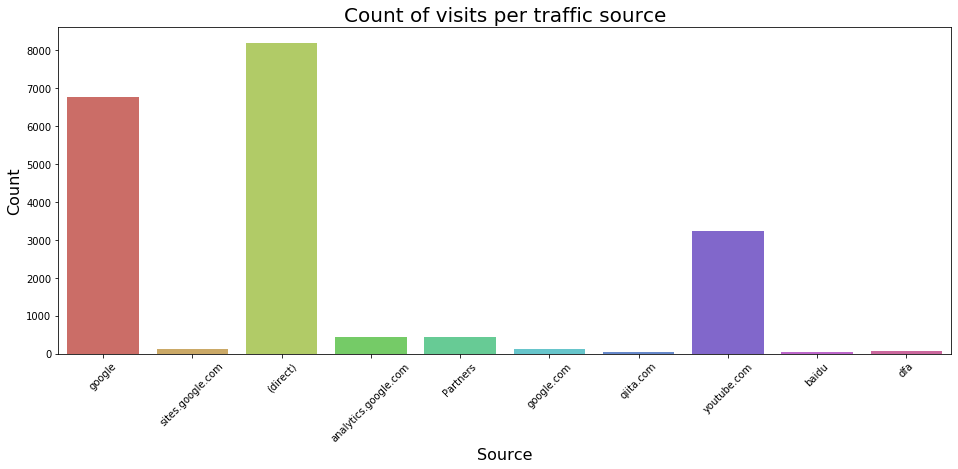

In [120]:
# Category Per Purchase
print("Count of visits per traffic source : ")
print(train_dc['trafficSource.source'].value_counts()[:7] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_dc[train_dc['trafficSource.source']\
                       .isin(train_dc['trafficSource.source']\
                             .value_counts()[:10].index.values)]['trafficSource.source'], palette="hls") 
plt.title("Count of visits per traffic source", fontsize=20) 
plt.xlabel("Source", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

Count of Visits resulting in Purchases : 
(direct)            142
google               47
google.com            2
sites.google.com      1
dfa                   1
Name: trafficSource.source, dtype: int64


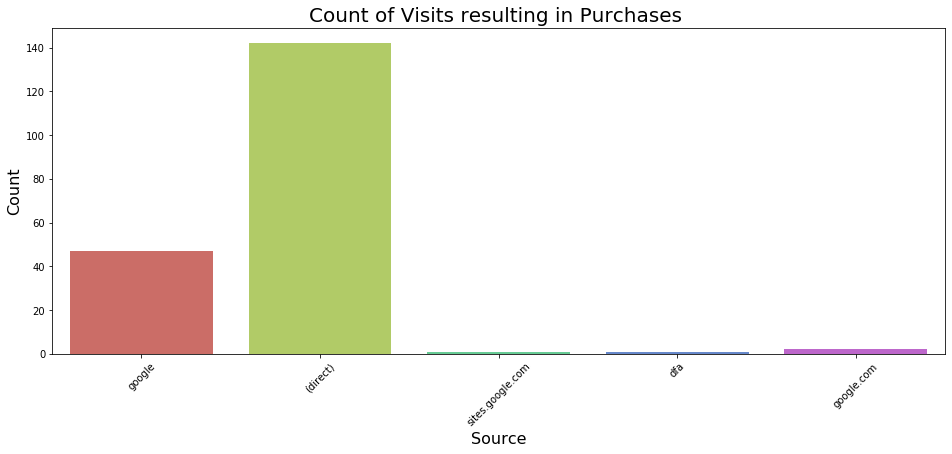

In [121]:
# Category Per Purchase
print("Count of Visits resulting in Purchases : ")
print(train_trx['trafficSource.source'].value_counts()[:7] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_trx[train_trx['trafficSource.source']\
                       .isin(train_trx['trafficSource.source']\
                             .value_counts()[:10].index.values)]['trafficSource.source'], palette="hls") 
plt.title("Count of Visits resulting in Purchases ", fontsize=20) 
plt.xlabel("Source", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

###The Charts above show that Direct Marketing factors for the largest number of visits and visits which resulted in purchases. Although organic searches come in at a close 2nd place in regards to visits, they fail to convert to purchases. This is also the case in terms of ads on youtube which google owns.


---





---


#**Building Our Model**


---



###First lets prepare our test data to ensure it has the same features as our training data set.

In [122]:
test.shape

(2000, 59)

In [123]:
const_cols = [c for c in test.columns if test[c].nunique(dropna=False)==1 ]
const_cols

['date',
 'socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [124]:
import pandas as pd
test.drop(['socialEngagementType', 'device.browserSize', 'device.browserVersion',
 'device.flashVersion', 'device.language',
 'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
 'device.mobileInputSelector', 'device.operatingSystemVersion',
 'device.screenColors', 'device.screenResolution',
 'geoNetwork.cityId', 'geoNetwork.latitude',
 'geoNetwork.longitude', 'geoNetwork.networkLocation',
 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters'], axis=1)

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20180511,7460955084541987166,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,NaN,4,NaN,3.0,1,973.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
1,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,460252456180441002,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,4,NaN,3.0,1,49.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3461808543879602873,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,NaN,4,NaN,3.0,1,24.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
3,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,975129477712150630,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,NaN,5,NaN,4.0,1,25.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,8381672768065729990,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,NaN,5,1.0,4.0,1,49.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,(not set),google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Organic Search,[],20180511,232136598143385104,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1526059119,1,1526059119,Chrome,desktop,False,Windows,not available in demo dataset,Africa,Kenya,not available in demo dataset,wananchi.com,not available in demo dataset,Eastern Africa,NaN,2,1.0,2.0,1,120.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,(not set),google
1996,Referral,"[{'index': '4', 'value': 'North America'}]",20180511,8826348888580636955,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1526073159,1,1526073159,Chrome,desktop,False,Windows,New York,Americas,United States,New York NY,verizon.net,New York,Northern America,NaN,2,1.0,2.0,1,3.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),/Rewards/Products/Details.aspx,(direct)
1997,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3733038012977519813,"[{'hitNumber': '1', 'time': '0', 'hour': '8', ...",152605265

In [125]:
import pandas as pd
test.drop(['socialEngagementType', 'device.browserSize', 'device.browserVersion',
 'device.flashVersion', 'device.language',
 'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
 'device.mobileInputSelector', 'device.operatingSystemVersion',
 'device.screenColors', 'device.screenResolution',
 'geoNetwork.cityId', 'geoNetwork.latitude',
 'geoNetwork.longitude', 'geoNetwork.networkLocation',
 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters'], axis=1)

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20180511,7460955084541987166,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,NaN,4,NaN,3.0,1,973.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
1,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,460252456180441002,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,4,NaN,3.0,1,49.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3461808543879602873,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,NaN,4,NaN,3.0,1,24.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
3,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,975129477712150630,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,NaN,5,NaN,4.0,1,25.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,8381672768065729990,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,NaN,5,1.0,4.0,1,49.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,(not set),google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Organic Search,[],20180511,232136598143385104,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1526059119,1,1526059119,Chrome,desktop,False,Windows,not available in demo dataset,Africa,Kenya,not available in demo dataset,wananchi.com,not available in demo dataset,Eastern Africa,NaN,2,1.0,2.0,1,120.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,(not set),google
1996,Referral,"[{'index': '4', 'value': 'North America'}]",20180511,8826348888580636955,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1526073159,1,1526073159,Chrome,desktop,False,Windows,New York,Americas,United States,New York NY,verizon.net,New York,Northern America,NaN,2,1.0,2.0,1,3.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(none),/Rewards/Products/Details.aspx,(direct)
1997,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3733038012977519813,"[{'hitNumber': '1', 'time': '0', 'hour': '8', ...",152605265

In [0]:
#train_dc is the training data post Column Cleanse
test_dc = pd.DataFrame(test, columns= ['channelGrouping',
'customDimensions',
'date',
'fullVisitorId',
'hits',
'visitId',
'visitNumber',
'visitStartTime',
'device.browser',
'device.deviceCategory',
'device.isMobile',
'device.operatingSystem',
'geoNetwork.city',
'geoNetwork.continent',
'geoNetwork.country',
'geoNetwork.metro',
'geoNetwork.networkDomain',
'geoNetwork.region',
'geoNetwork.subContinent',
'totals.bounces',
'totals.hits',
'totals.newVisits',
'totals.pageviews',
'totals.sessionQualityDim',
'totals.timeOnSite',
'totals.totalTransactionRevenue',
'totals.transactionRevenue',
'totals.transactions',
'trafficSource.adContent',
'trafficSource.adwordsClickInfo.adNetworkType',
'trafficSource.adwordsClickInfo.gclId',
'trafficSource.adwordsClickInfo.isVideoAd',
'trafficSource.adwordsClickInfo.page',
'trafficSource.adwordsClickInfo.slot',
'trafficSource.campaign',
'trafficSource.isTrueDirect',
'trafficSource.keyword',
'trafficSource.medium',
'trafficSource.referralPath',
'trafficSource.source',
])

In [127]:
test_dc.shape

(2000, 40)

In [128]:
#Now let's further clean the data to show visits that ended up in purchaes only
import numpy as np
test_trx = test_dc[np.isfinite(train_dc['totals.totalTransactionRevenue'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [129]:
test_trx.shape

(24, 40)

In [130]:
test_dc.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20180511,7460955084541987166,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,NaN,4,NaN,3.0,1,973.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
1,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,460252456180441002,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,4,NaN,3.0,1,49.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3461808543879602873,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,NaN,4,NaN,3.0,1,24.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
3,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,975129477712150630,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,NaN,5,NaN,4.0,1,25.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,8381672768065729990,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,NaN,5,1.0,4.0,1,49.0,NaN,NaN,NaN,(not set),NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,(not set),google


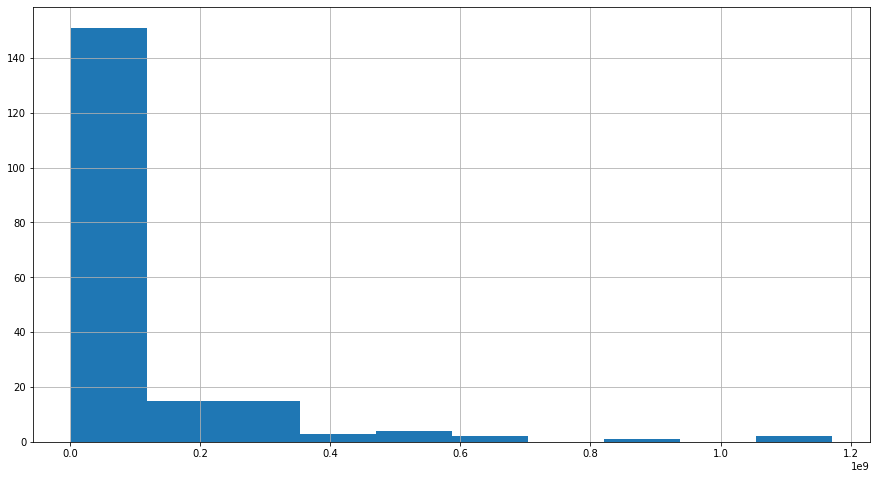

In [131]:
train_dc["totals.transactionRevenue"].hist(figsize=(15, 8))

In [0]:
# Input 0 for missing target values
train_dc["totals.transactionRevenue"].fillna(0, inplace=True)
train_y = train_dc["totals.transactionRevenue"].values
train_id = train_dc["fullVisitorId"].values
test_id = test_dc["fullVisitorId"].values

In [133]:
test_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
channelGrouping                                 2000 non-null object
customDimensions                                2000 non-null object
date                                            2000 non-null int64
fullVisitorId                                   2000 non-null uint64
hits                                            2000 non-null object
visitId                                         2000 non-null int64
visitNumber                                     2000 non-null int64
visitStartTime                                  2000 non-null int64
device.browser                                  2000 non-null object
device.deviceCategory                           2000 non-null object
device.isMobile                                 2000 non-null bool
device.operatingSystem                          2000 non-null object
geoNetwork.city                                 2000 non-null object
ge

In [134]:
# Input zero for missing target values
train_dc["totals.transactionRevenue"].fillna(0, inplace=True)
train_y = train_dc["totals.transactionRevenue"].values
train_id = train_dc["fullVisitorId"].values
test_id = test_dc["fullVisitorId"].values


# Encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_dc[col].values.astype('str')) + list(test_dc[col].values.astype('str')))
    train_dc[col] = lbl.transform(list(train_dc[col].values.astype('str')))
    test_dc[col] = lbl.transform(list(test_dc[col].values.astype('str')))


num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    train_dc[col] = train_dc[col].astype(float)
    test_dc[col] = test_dc[col].astype(float)

# Separate the train dataset into development and valid based on time.
dev_dc = train_dc[train_dc['date']<=(20170531)]
val_dc = train_dc[train_dc['date']>(20170531)]
dev_y = np.log1p(dev_dc["totals.transactionRevenue"].values)
val_y = np.log1p(val_dc["totals.transactionRevenue"].values)

dev_X = dev_dc[cat_cols + num_cols] 
val_X = val_dc[cat_cols + num_cols] 
test_X = test_dc[cat_cols + num_cols] 
train_X = train_dc[cat_cols + num_cols] 

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [136]:
# Create a function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.50574
Early stopping, best iteration is:
[60]	valid_0's rmse: 1.4946


In [0]:
from sklearn import metrics
pred_val[pred_val<0] = 0
val_pred_dc = pd.DataFrame({"fullVisitorId":val_dc["fullVisitorId"].values})
val_pred_dc["transactionRevenue"] = val_dc["totals.transactionRevenue"].values
val_pred_dc["PredictedRevenue"] = np.expm1(pred_val)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_dc["transactionRevenue"].values), np.log1p(val_pred_dc["PredictedRevenue"].values))))
val_pred_dc = val_pred_dc.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_dc["transactionRevenue"].values), np.log1p(val_pred_dc["PredictedRevenue"].values))))

1.5073576313350845


###As shown above Validation score is a 1.5073. 

---


###When we compare to the public leaderboard on the kaggle competition page we see that they have a score of 1.44. Which brings our findings close to this number.

In [0]:
sub_dc = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_dc["PredictedLogRevenue"] = np.expm1(pred_test)
sub_dc = sub_dc.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_dc.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_dc["PredictedLogRevenue"] = np.log1p(sub_dc["PredictedLogRevenue"])
sub_dc.to_csv("baseline_lgb.csv", index=False)

In [138]:
sub_dc.head()


,fullVisitorId,PredictedLogRevenue
0,2037789921357424,0.000000
1,2201938260490877,5.606675
2,3809040884259760,0.000000
3,5775569756141586,0.000000
4,6948037456238434,0.254404


In [139]:
sub_dc

,fullVisitorId,PredictedLogRevenue
0,2037789921357424,0.000000
1,2201938260490877,5.606675
2,3809040884259760,0.000000
3,5775569756141586,0.000000
4,6948037456238434,0.254404
...,...,...
1850,9980714914562998136,0.000000
1851,9983865263448049652,0.000000
1852,9984698515461232154,0.098050
1853,9986333561130369850,3.538197


#**Conclusions and closing statements:**
Based on the simple study and categories we found that the following features affected the outcome of wether a visitor would end up buying from the store or not:
- date: Annually, around the end of the year to the beginning of the year both traffic and purchases increase.
- visitStartTime: Hour of the day and day of  the week also factors in.
- device.operatingSystem: Windows has most visits but Mac most purchases
- geoNetwork.continent: Americas definitely has the most transactions.
- geoNetwork.city: Urban Areas take the lead
- device.deviceCategory: desktop reins supreme
- trafficSource.source: Direct marketing is successful 

---

###Because of results found above the suggestion for an increase in sales is as follow:
- Since there is notable increase in bot visits and purchases during the end of the year, we suggest that most purchses do happen around the holiday season. Especially since most of the visitors and visitors purchasing items are from Northern America
- Asia Comes in at 3rd place in terms of traffic. This is explained above, which is why since Europe comes in at 2nd place in regrds to traffic, an increase focus in the EU market could increase sales.
- A clear increase in traffic come in around 3pm GMT, and since most visits are from the New York or California area, this means that they are at work since the most popular day to visit the store was a thursday. There is also an uptick in purchases around 4pm EST.
- Another indication that visitors come in from work is the notable number of desktop users.
- Direct marketing holds the highest ranking in how visitors visit the site.

#Finally:
We believe that a focus on direct marketing year round and a focus around the holiday season in the US and EU could be the best probability for an increase in sales.



###References: 


https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
---
https://stackoverflow.com/questions/43392588/how-to-increase-the-figure-size-of-dataframe-hist-for-pandas-0-11-0
---
https://www.geeksforgeeks.org/python-pandas-series-dt-dayofweek/
---
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
---
https://python-graph-gallery.com/
---
https://stackoverflow.com/questions/44315815/python-pathlib-path-object-not-converting-to-string
---
https://guide.freecodecamp.org/python/converting-integer-to-string-in-python/
---
https://seaborn.pydata.org/generated/seaborn.barplot.html
---
https://python-graph-gallery.com/seaborn/
---



